# Visualizing the algorithm's process

We demonstrate visually the workings of the algorithm's stages: from an untrained SOM to a fully segmented/clusterized graph.

We use both the spiral and Taquari dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustering import (
    translate_1d_to_2d, translate_2d_to_1d, distance_matrix, minimum_spanning_tree,
    prune_smallest_dbi, MiniSom
)
# for plotting graphs, may need to install with pip
import networkx as nx
import sys
sys.path.append('..')
from som.artificial_data import normalized_data

In [10]:
def plot_process(
    data,
    shape: tuple[int, int],
    k: int,
    random_seed: int = 42,
    topology: str = 'rectangular',
    sigma: float = 1.0,
) -> None:
    print(f'k = {k}, shape = {shape}, {topology} topology')
    n, m = shape
    som = MiniSom(n, m, data.shape[1], random_seed=random_seed, topology=topology)
    weights = som.get_weights()
    is_2d = weights.shape[2] == 2
    define_positions = lambda i, j: weights[i][j].copy() if is_2d else [j + int(i % 2 == 1) / 2, 5 - i]
    initial_positions = {
        translate_2d_to_1d(i, j, (n, m)): define_positions(i, j) for i in range(n) for j in range(m)
    }
    som.train(data, 10 * data.shape[0])
    weights = som.get_weights()
    positions = {
        translate_2d_to_1d(i, j, (n, m)): define_positions(i, j) for i in range(n) for j in range(m)
    }
    D_matrix = distance_matrix(som)
    nx.draw(nx.from_numpy_array(D_matrix), pos=initial_positions, with_labels=True)
    plt.show()
    mst = minimum_spanning_tree(D_matrix, overwrite=True).toarray()
    dbi_pruned = prune_smallest_dbi(som, data, k, mst)
    for adj_matrix in [D_matrix, mst, dbi_pruned]:
        G = nx.from_numpy_array(adj_matrix)
        nx.draw(G, pos=positions, with_labels=True)
        plt.show()

## Spiral

k = 2, shape = (4, 7), rectangular topology


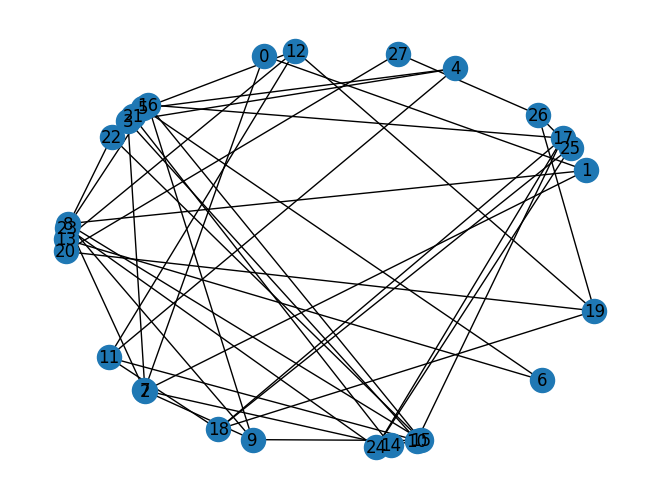

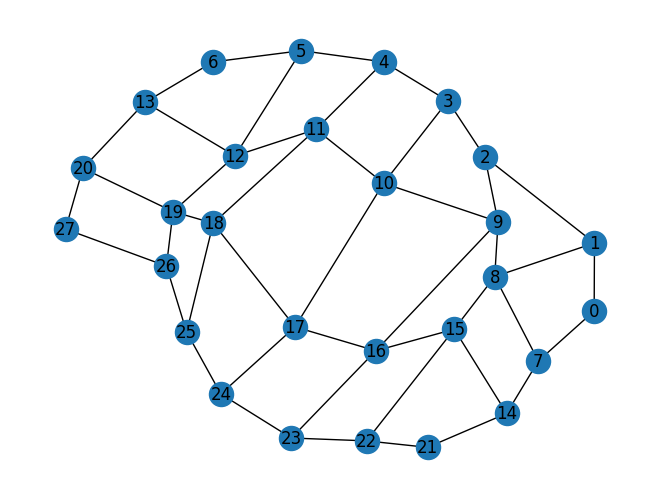

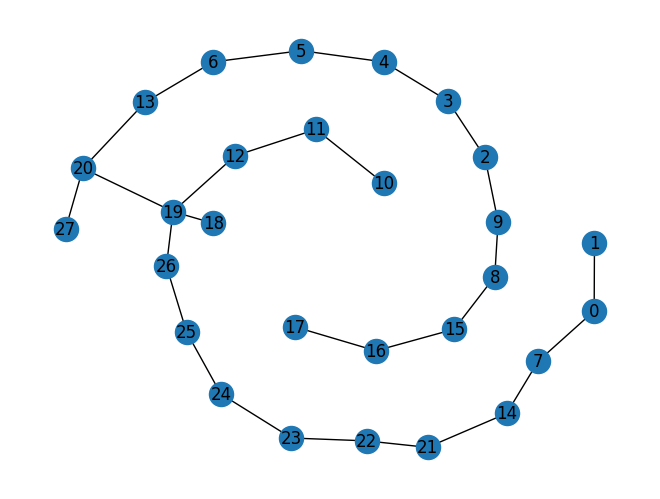

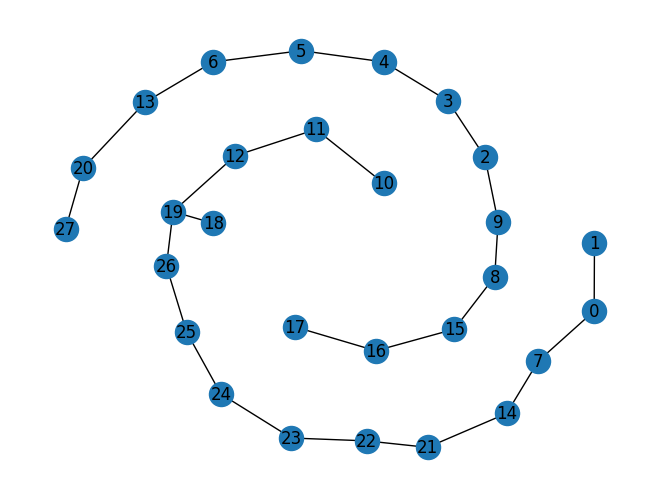

In [24]:
spiral_data = normalized_data['spiral']
for topology in ['rectangular']:
    plot_process(spiral_data, (4, 7), k=2, topology=topology)

## Taquari

k = 8, shape = (6, 5), hexagonal topology


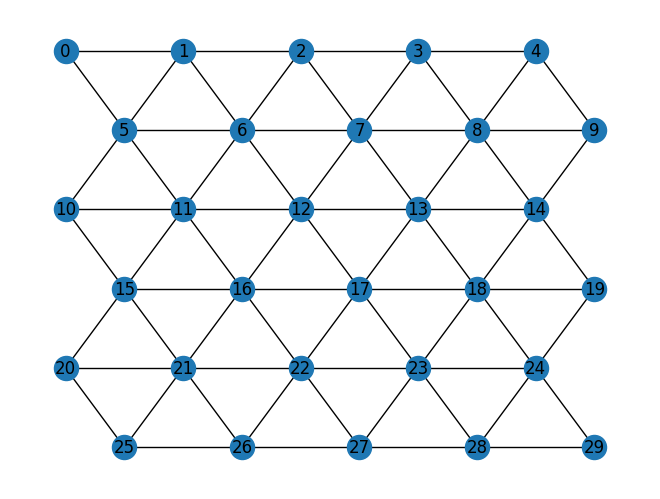

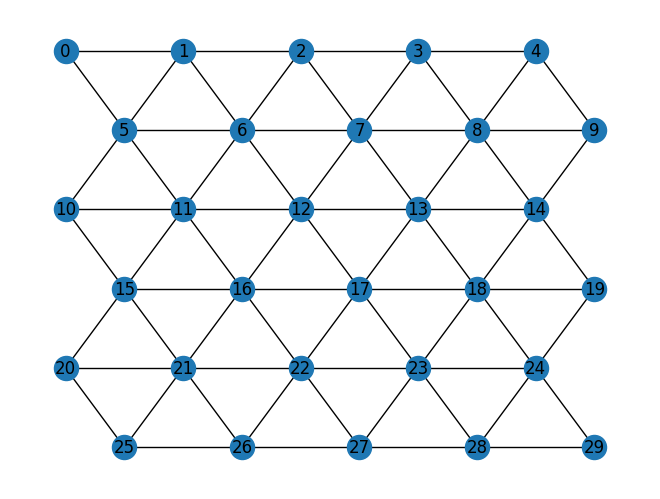

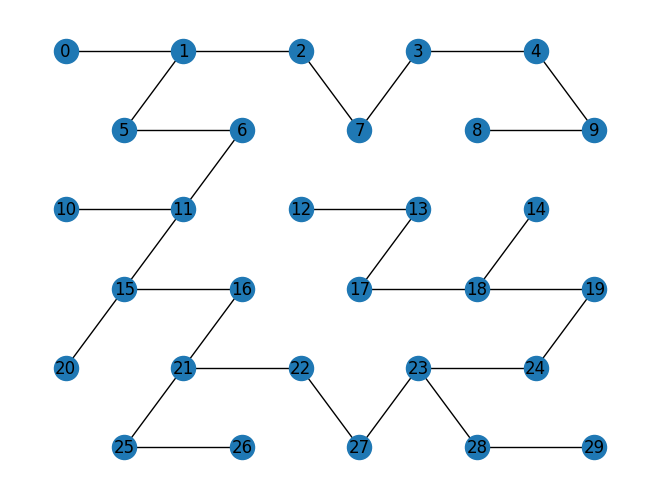

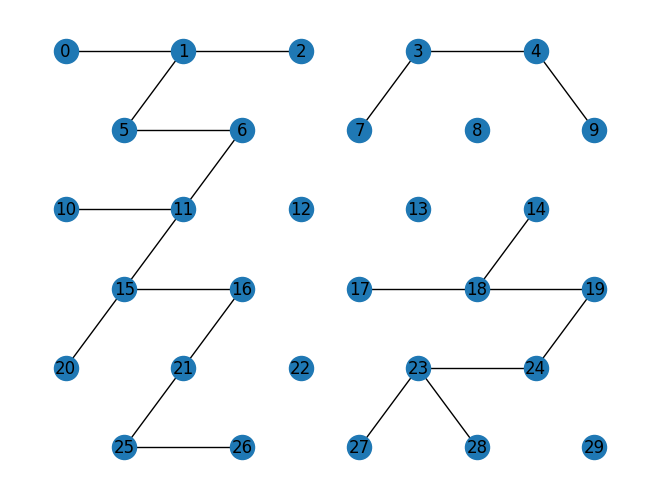

In [12]:
taquari_data = pd.read_csv('../data/taquari.csv')
taquari_data = taquari_data.drop(columns=['id', 'za']).values
taquari_data = taquari_data / np.max(taquari_data)
plot_process(taquari_data, k=8, shape=(6, 5), topology='hexagonal')

In [11]:
n, m = 6, 5

for i in range(n):
    for j in range(m):
        print( translate_2d_to_1d(i, j, (n, m)), [j + int(i % 2 == 1) / 2, 5 - i])

0 [0.0, 5]
1 [1.0, 5]
2 [2.0, 5]
3 [3.0, 5]
4 [4.0, 5]
5 [0.5, 4]
6 [1.5, 4]
7 [2.5, 4]
8 [3.5, 4]
9 [4.5, 4]
10 [0.0, 3]
11 [1.0, 3]
12 [2.0, 3]
13 [3.0, 3]
14 [4.0, 3]
15 [0.5, 2]
16 [1.5, 2]
17 [2.5, 2]
18 [3.5, 2]
19 [4.5, 2]
20 [0.0, 1]
21 [1.0, 1]
22 [2.0, 1]
23 [3.0, 1]
24 [4.0, 1]
25 [0.5, 0]
26 [1.5, 0]
27 [2.5, 0]
28 [3.5, 0]
29 [4.5, 0]
